In [1]:
from platform import python_version
print(python_version())

3.9.7


In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Importar los datos del paso anterior

In [2]:

'''
     Carga X e y.

     '''
# Read in data
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)
y=y["Perf"]

In [4]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [5]:
y.describe()

count    18520.000000
mean         0.213595
std          1.271590
min         -0.993542
25%         -0.128736
50%          0.098373
75%          0.350978
max         82.375000
Name: Perf, dtype: float64

In [6]:
y.mean()

0.21359472483409114

# Regresión lineal

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)
print('X training matrix dimensions: ', X_train.shape)
print('X testing matrix dimensions: ', X_test.shape)
print('y training matrix dimensions: ', y_train.shape)
print('y testing matrix dimensions: ', y_test.shape)

# Save CSVs incase want to see the data.
# X_train.to_csv("Annual_Stock_Price_Fundamentals_Ratios_train.csv")
# X_test.to_csv("Annual_Stock_Price_Fundamentals_Ratios_test.csv")
# y_train.to_csv("Annual_Stock_Price_Performance_Percentage_train.csv")
# y_test.to_csv("Annual_Stock_Price_Performance_Percentage_test.csv")

X training matrix dimensions:  (16668, 18)
X testing matrix dimensions:  (1852, 18)
y training matrix dimensions:  (16668,)
y testing matrix dimensions:  (1852,)


In [94]:
# Read in data
# x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
# y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)

In [95]:
# y.drop('Ticker', axis=1, inplace=True)

In [68]:
y_train

317     -0.707602
4869     0.247619
63       1.311688
3668     1.689754
14236   -0.038902
           ...   
740      0.045642
1032     0.250000
5520     0.330387
3046    -0.149632
2915     0.851254
Name: Perf, Length: 16668, dtype: float64

In [106]:
X_train

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
317,18.636485,0.123166,-106.086710,7.945396,0.347064,0.968113,1.544024,-0.074895,0.057602,18.427393,1.054267,0.306714,3.323443,0.104198,0.088247,-0.605242,0.048259,0.054267
4869,9.703661,0.018879,43.016603,0.292326,0.185477,2.643105,0.575550,0.006796,0.018479,0.472394,3.116878,0.249173,1.295479,0.179465,-0.116800,0.653482,0.013394,2.116878
63,23.627588,0.262437,38.558342,7.681545,3.970621,-200.000000,2.251901,0.199219,0.261847,0.723257,2.382634,1.569145,15.078064,0.289827,0.468817,0.325894,0.163790,1.382634
3668,-61.089289,0.011100,-18.254023,1.382738,2.408754,0.495022,0.890914,-0.075750,0.000000,2.195572,1.455462,0.012419,0.190578,0.794963,-0.006749,0.222717,-0.014880,0.455462
14236,13.318323,1.100010,20.061106,6.148122,1.611838,56.665823,0.392747,0.306470,0.372433,1.028529,1.972263,0.039745,4.244329,0.266407,-0.238110,-0.190496,0.226398,0.972263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,9.454159,0.151076,14.468135,2.097293,2.103213,14.691832,3.001341,0.144959,0.185060,0.451108,3.216765,0.792221,1.035438,0.253422,0.185425,0.603291,0.167914,2.216765
1032,11.036409,0.081608,17.656310,1.209104,0.519864,3.269881,1.442658,0.068480,0.078599,1.422246,1.703113,0.588359,1.628580,0.164617,0.114068,0.025179,0.058345,0.703113
5520,-39.610651,-0.205147,-15.938330,7.612914,5.617227,800.000000,3.174342,-0.477648,0.000000,0.267102,4.743886,2.706255,8.297884,0.759963,0.441310,-0.726759,-0.137813,3.743886
3046,34.543923,2.613402,29.795992,3.836234,5.369454,11.048426,1.301497,0.128750,0.076404,0.687724,2.454071,0.571257,30.163735,0.446638,0.019124,0.188636,0.071557,1.454071


In [5]:
y_train.describe()

count    16668.000000
mean         0.212545
std          1.287201
min         -0.993542
25%         -0.128991
50%          0.097956
75%          0.349693
max         82.375000
Name: Perf, dtype: float64

In [9]:
y_test.describe()

count    1852.000000
mean        0.223045
std         1.121625
min        -0.938811
25%        -0.122150
50%         0.107503
75%         0.369351
max        37.750000
Name: Perf, dtype: float64

In [4]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(X_train, y_train)
y_pred = pl_linear.predict(X_test)
print('train mse: ', mean_squared_error(y_train, pl_linear.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, pl_linear.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(pl_linear.score(X_train, y_train)))
print('Test set score:', format(pl_linear.score(X_test, y_test)))
      
import pickle # To save the fitted model
pickle.dump(pl_linear, open("pl_linear.p", "wb" ))

train mse:  1.6365676779325797
test mse:  1.261996242597575
train rmse:  1.279284048963552
test rmse:  1.1233860612441189
Training set score: 0.012203825008809566
Test set score: -0.003684421303389751


In [10]:
pl_linear['linear'].intercept_

0.2125447068888507

In [12]:
pl_linear['linear'].coef_

array([0.01364865, 0.02157053, 0.00492454, 0.03215442, 0.09206746,
       0.00539719, 0.00207715, 0.02379768, 0.03259086, 0.05848592,
       0.02744335, 0.0690489 , 0.00150818, 0.01119817, 0.02791962,
       0.05572714, 0.11107421, 0.01842568])

Feature: 0, P-value: 0.00000
Feature: 1, P-value: 0.18300
Feature: 2, P-value: 0.05000
Feature: 3, P-value: 0.63000
Feature: 4, P-value: 0.01100
Feature: 5, P-value: 0.00000
Feature: 6, P-value: 0.60000
Feature: 7, P-value: 0.93400
Feature: 8, P-value: 0.02800
Feature: 9, P-value: 0.04000
Feature: 10, P-value: 0.00000
Feature: 11, P-value: 0.75100
Feature: 12, P-value: 0.00000
Feature: 13, P-value: 0.88000
Feature: 14, P-value: 0.30000
Feature: 15, P-value: 0.21600
Feature: 16, P-value: 0.00000
Feature: 17, P-value: 0.00000
Feature: 18, P-value: 0.82600


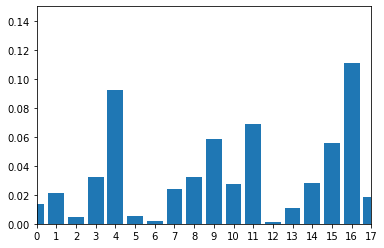

In [95]:
# summarize feature importance
for i,v in enumerate(p_values):
	print('Feature: %0d, P-value: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.axis([0, 17, 0, 0.15])
plt.locator_params(axis='x', nbins=17)
pyplot.show()

In [37]:
columnas = X_train.columns
for count, item in enumerate(columnas):
  print('Feature:',(count),'Ratio:',(item))


Feature: 0 Ratio: EV/EBIT
Feature: 1 Ratio: Op. In./(NWC+FA)
Feature: 2 Ratio: P/E
Feature: 3 Ratio: P/B
Feature: 4 Ratio: P/S
Feature: 5 Ratio: Op. In./Interest Expense
Feature: 6 Ratio: Working Capital Ratio
Feature: 7 Ratio: RoE
Feature: 8 Ratio: ROCE
Feature: 9 Ratio: Debt/Equity
Feature: 10 Ratio: Debt Ratio
Feature: 11 Ratio: Cash Ratio
Feature: 12 Ratio: Asset Turnover
Feature: 13 Ratio: Gross Profit Margin
Feature: 14 Ratio: (CA-CL)/TA
Feature: 15 Ratio: RE/TA
Feature: 16 Ratio: EBIT/TA
Feature: 17 Ratio: Book Equity/TL


In [93]:
pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(X_train, y_train)
params = np.append(pl_linear['linear'].intercept_,pl_linear['linear'].coef_)
predictions = pl_linear.predict(X_train)

newX = np.append(np.ones((len(pl_linear['Power Transformer'].fit_transform(X_train)),1)), pl_linear['Power Transformer'].fit_transform(X_train), axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0         0.2125            0.010    21.438          0.000
1        -0.0136            0.010    -1.331          0.183
2         0.0216            0.011     1.962          0.050
3        -0.0049            0.010    -0.482          0.630
4         0.0322            0.013     2.548          0.011
5        -0.0921            0.012    -7.387          0.000
6        -0.0054            0.010    -0.524          0.600
7        -0.0021            0.025    -0.083          0.934
8         0.0238            0.011     2.204          0.028
9         0.0326            0.016     2.057          0.040
10       -0.0585            0.016    -3.643          0.000
11       -0.0274            0.087    -0.317          0.751
12        0.0690            0.018     3.855          0.000
13        0.0015            0.010     0.151          0.880
14        0.0112            0.011     1.036          0.300
15       -0.0279            0.023    -1.237          0.2

In [46]:
import statsmodels.api as sm
from scipy import stats

In [9]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(X_train))
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.43
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.24e-33
Time:                        12:34:19   Log-Likelihood:                -27756.
No. Observations:               16668   AIC:                         5.555e+04
Df Residuals:                   16649   BIC:                         5.570e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2125      0.010     21.438      0.000       0.193       0.232
x1            -0.0136      0.010     -1.331      0.183      -0.034       0.006
x2             0.0216      0.011      1.962      0.050    2.02e-05       0.043
x3            -0.0049      0.010     -0.482      0.630      -0.025       0.015
x4             0.0322      0.013      2.548      0.011       0.007       0.057
x5            -0.0921      0.012     -7.387      0.000      -0.116      -0.068
x6            -0.0054      0.010     -0.524      0.600      -0.026       0.015
x7            -0.0021      0.025     -0.083      0.934      -0.051       0.047
x8             0.0238      0.011      2.204      0.028       0.003       0.045
x9             0.0326      0.016      2.057      0.040       0.002       0.064
x10           -0.0585      0.016     -3.643      0.000      -0.090      -0.027
x11           -0.0274      0.087     -0.317      0.751      -0.197       0.142
x12            0.0690      0.018      3.855      0.000       0.034       0.104
x13            0.0015      0.010      0.151      0.880      -0.018       0.021
x14            0.0112      0.011      1.036      0.300      -0.010       0.032
x15           -0.0279      0.023     -1.237      0.216      -0.072       0.016
x16           -0.0557      0.013     -4.435      0.000      -0.080      -0.031
x17           -0.1111      0.016     -6.805      0.000      -0.143      -0.079
x18           -0.0184      0.084     -0.220      0.826      -0.182       0.145
==============================================================================
Omnibus:                    47562.711   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3163701052.685
Skew:                          38.195   Prob(JB):                         0.00
Kurtosis:                    2135.963   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
predictionss = model.predict(sm.add_constant(pl_linear['Power Transformer'].fit_transform(X_test)))

In [20]:
predictionss_error = y_test - predictionss

In [21]:
predictionss_error

9836     0.134522
5390     0.012832
13349   -0.266738
7921    -0.700370
7193    -0.273932
           ...   
7061     0.631099
9485    -0.125984
7699     0.064179
7312    -0.156888
13814    0.085023
Name: Perf, Length: 1852, dtype: float64

In [36]:
y_test

9836     0.193582
5390     0.195844
13349    0.045537
7921    -0.270492
7193     0.030639
           ...   
7061     0.858320
9485    -0.027585
7699     0.378947
7312    -0.070546
13814    0.255294
Name: Perf, Length: 1852, dtype: float64

In [49]:
pl_linear['linear'].coef_

array([-0.01364865,  0.02157053, -0.00492454,  0.03215442, -0.09206746,
       -0.00539719, -0.00207715,  0.02379768,  0.03259086, -0.05848592,
       -0.02744335,  0.0690489 ,  0.00150818,  0.01119817, -0.02791962,
       -0.05572714, -0.11107421, -0.01842568])

In [37]:
pl_linear['linear'].intercept_

array([0.21254471])

In [68]:
print(" lr.coef_:", tr.transform(X_train)) 

 lr.coef_: [[ 0.04451171 -0.07134604 -0.98044767 ... -0.82683003 -0.0498163
  -1.27277271]
 [-0.09289997 -0.19167501  0.20469003 ...  1.08489006 -0.23775222
   0.75881167]
 [ 0.12236175  0.09037647  0.16543127 ...  0.32589859  0.65974623
   0.33294018]
 ...
 [-0.7376784  -0.44778946 -0.2941105  ... -0.91270211 -0.930281
   1.340799  ]
 [ 0.29448278  2.9320378   0.08852342 ...  0.07123983  0.08238121
   0.38200562]
 [ 0.12636138  0.2635986   0.09409559 ... -1.65735478  0.41912919
  -0.02241379]]


In [52]:
# Can see the importance of each feature.
coe, scoresli=[],[]
for k, score in zip(x.keys(), np.abs(pl_linear['linear'].coef_)):
    print(k,':', round(score,3))
    coe.append(k)
    scoresli.append(score)

EV/EBIT : 0.014
Op. In./(NWC+FA) : 0.022
P/E : 0.005
P/B : 0.032
P/S : 0.092
Op. In./Interest Expense : 0.005
Working Capital Ratio : 0.002
RoE : 0.024
ROCE : 0.033
Debt/Equity : 0.058
Debt Ratio : 0.027
Cash Ratio : 0.069
Asset Turnover : 0.002
Gross Profit Margin : 0.011
(CA-CL)/TA : 0.028
RE/TA : 0.056
EBIT/TA : 0.111
Book Equity/TL : 0.018


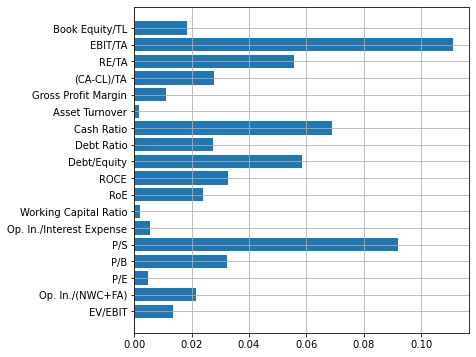

In [96]:
plt.figure(figsize=(6,6))
plt.barh(coe,scoresli)
plt.grid()

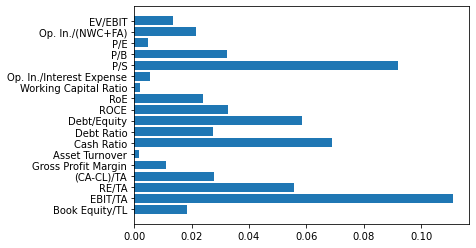

In [92]:
# creating graph space for two graphs
graph, (plot2) = plt.subplots(1,1)
 
# plot2 graph for inverted axes
plot2.barh(coe,scoresli)
plot2.invert_yaxis()
 
# display the graph

plt.show()

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
# Can see the importance of each feature in random forest.
coe2, scoresli2=[],[]
for k2, score2 in zip(x.keys(), p_values[1:19]):
    print(k2,':', round(score2,3))
    coe2.append(k2)
    scoresli2.append(score2)

EV/EBIT : 0.183
Op. In./(NWC+FA) : 0.05
P/E : 0.63
P/B : 0.011
P/S : 0.0
Op. In./Interest Expense : 0.6
Working Capital Ratio : 0.934
RoE : 0.028
ROCE : 0.04
Debt/Equity : 0.0
Debt Ratio : 0.751
Cash Ratio : 0.0
Asset Turnover : 0.88
Gross Profit Margin : 0.3
(CA-CL)/TA : 0.216
RE/TA : 0.0
EBIT/TA : 0.0
Book Equity/TL : 0.826


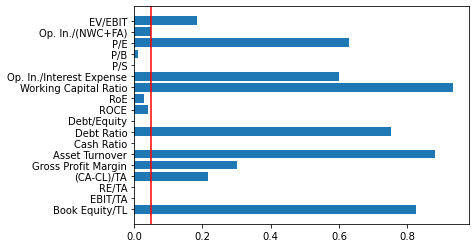

In [108]:
# creating graph space for two graphs
graph, (plot2) = plt.subplots(1,1)
 
# plot2 graph for inverted axes
plot2.barh(coe2,scoresli2)
plot2.invert_yaxis()
plot2.axvline(x=0.05, color='r', linestyle='-')
 
# display the graph

plt.show()

In [21]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Try a few values of K, show results.
vals=[2,5,10,50,100,200]

for i in vals:
    scores = cross_validate(pl_linear, x, y, scoring='neg_mean_squared_error', cv=i, return_train_score=True)
    print('K=', i,'Segments')
    
    #print('Train scores',np.sqrt(-scores['train_score']))
    #print('Test scores',np.sqrt(-scores['test_score']))
    
    print('AVERAGE TEST SCORE:',\
          round(np.sqrt(-scores['test_score']).mean(),4),\
         'STD. DEV.:', round(np.sqrt(-scores['test_score']).std(),4))
    
    print('AVERAGE TRAIN SCORE:',\
          round(np.sqrt(-scores['train_score']).mean(),4),\
         'STD. DEV.:', round(np.sqrt(-scores['train_score']).std(),4))
    
    print('-----------------')

K= 2 Segments
AVERAGE TEST SCORE: 1.26 STD. DEV.: 0.1487
AVERAGE TRAIN SCORE: 1.2542 STD. DEV.: 0.1488
-----------------
K= 5 Segments
AVERAGE TEST SCORE: 1.2033 STD. DEV.: 0.4018
AVERAGE TRAIN SCORE: 1.2606 STD. DEV.: 0.0926
-----------------
K= 10 Segments
AVERAGE TEST SCORE: 1.1541 STD. DEV.: 0.5249
AVERAGE TRAIN SCORE: 1.2626 STD. DEV.: 0.0646
-----------------
K= 50 Segments
AVERAGE TEST SCORE: 0.9786 STD. DEV.: 0.8061
AVERAGE TRAIN SCORE: 1.264 STD. DEV.: 0.0303
-----------------
K= 100 Segments
AVERAGE TEST SCORE: 0.9007 STD. DEV.: 0.8929
AVERAGE TRAIN SCORE: 1.2642 STD. DEV.: 0.0218
-----------------
K= 200 Segments
AVERAGE TEST SCORE: 0.825 STD. DEV.: 0.9622
AVERAGE TRAIN SCORE: 1.2643 STD. DEV.: 0.0156
-----------------


In [5]:
# Output scatter plot and contour plot of density of points to see if prediciton matches reality
# Line of x=y is provided, perfect prediction would have all density on this line
# Also plot linear regression of the scatter

# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plotDensityContourPredVsReal(model_name, x_plot, y_plot, ps):
    # Plotting scatter 
    plt.scatter(x_plot, y_plot, s=1)
    # Plotting linear regression
    # Swap X and Y fit because prediction is quite centered around one value.
    LinMod = LinearRegression().fit(y_plot.reshape(-1, 1), x_plot.reshape(-1, 1))
    xx=[[-5],[5]]
    yy=LinMod.predict(xx)
    plt.plot(yy,xx,'g')
    # Plot formatting
    plt.grid()
    plt.axhline(y=0, color='r', label='_nolegend_')
    plt.axvline(x=0, color='r', label='_nolegend_')
    plt.xlabel('Retorno estimado')
    plt.ylabel('Retorno real')
    plt.plot([-100,100],[-100,100],'y--')
    plt.xlim([-ps,ps])
    plt.ylim([-ps,ps])
    plt.title('Dispercion entre retorno estimado y real  {}'.format(model_name))
    plt.legend(['Linea de ajuste lineal','y=x Linea de estimación perfecta','Puntos de predicción'])
    # Save Figure
    #plt.figure(figsize=(5,5))
    #plt.savefig('result.png')

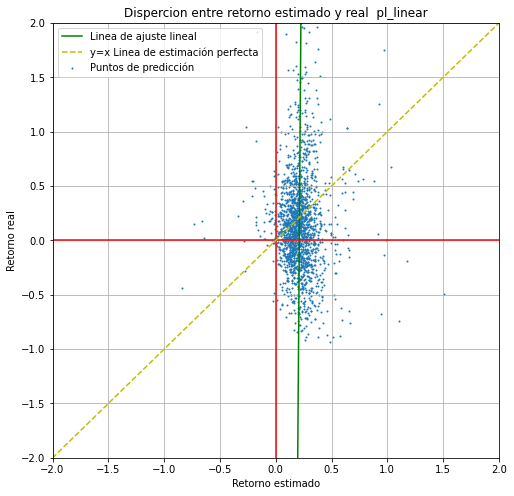

In [28]:
plt.figure(figsize=(8,8))
plotDensityContourPredVsReal('pl_linear', y_pred, y_test.to_numpy(), 2)

In [13]:
# See top 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0]) # Top 10 predicted returns
y_test_reindexed=y_test.reset_index(drop=True)

print('Predicted Returns:',y_predtest[bl_top10][0].values)
print('Actual Returns:', y_test_reindexed[bl_top10].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%')

Predicted Returns: [1.17988295 1.03136982 1.51179278 0.96547429 0.98724291 0.96706321
 0.92937121 1.1043519  0.94093654]
Actual Returns: [-0.19148936  0.67364017 -0.49180328 -0.13697524  0.          1.74736842
  1.25       -0.74330357 -0.67333333]
Top 10 Predicted Returns: 106.86 % 

Actual Top 10 Returns: 15.93 %


In [14]:
# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Bottom 10 Predicted Returns: -53.61 % 

Actual Bottom 10 Returns: 25.0 %


In [17]:
# Create table of top10/bottom 10 averaged, 10 rows of 10 random_states.
def observePredictionAbility(my_pipeline):
    Top10PredRtrns=np.array([])
    Top10ActRtrns=np.array([])
    Bottom10PredRtrns=np.array([])
    Bottom10ActRtrns=np.array([])

    for i in range (0,10):
        
        X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.1, random_state=i)
        
        my_pipeline.fit(X_train, y_train)
        y_pred = my_pipeline.predict(X_test)
        
        # See top 10 stocks and see how the values differ
        y_predtest=pd.DataFrame(y_pred)
        bl_top10 = \
        (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
        
        y_test_reindexed=y_test.reset_index(drop=True)
        
        Top10PredRtrns = np.append(Top10PredRtrns,\
                round( np.mean(y_predtest[bl_top10][0])*100,2 ))
        Top10ActRtrns = np.append(Top10ActRtrns,\
                round( np.mean(y_test_reindexed[bl_top10])*100,2 ))
        
        # See bottom 10 stocks and see how the values differ
        y_predtest=pd.DataFrame(y_pred)
        bl_bottom10 =\
        (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])
        
        #print('Returns:',y_predtest[bl_bottom10][0].values)
        Bottom10PredRtrns = np.append(Bottom10PredRtrns,\
                round( np.mean(y_predtest[bl_bottom10][0])*100,2 ))
        #print('Returns:',y_test_reindexed[bl_bottom10].values)
        Bottom10ActRtrns = np.append( Bottom10ActRtrns,\
                round(np.mean(y_test_reindexed[bl_bottom10])*100,2 ))

    
    print('Predicted Performance of Top 10 Return Portfolios:', Top10PredRtrns)
    print('Actual Performance of Top 10 Return Portfolios:', Top10ActRtrns,'\n')
    print('Predicted Performance of Bottom 10 Return Portfolios:', Bottom10PredRtrns)
    print('Actual Performance of Bottom 10 Return Portfolios:', Bottom10ActRtrns)
    
    print('--------------\n')
    
    print('Mean Predicted Std. Dev. of Top 10 Return Portfolios:',round(Top10PredRtrns.std(),2))
    print('Mean Actual Std. Dev. of Top 10 Return Portfolios:',round(Top10ActRtrns.std(),2))
    print('Mean Predicted Std. Dev. of Bottom 10 Return Portfolios:',round(Bottom10PredRtrns.std(),2))
    print('Mean Actual Std. Dev. of Bottom 10 Return Portfolios:',round(Bottom10ActRtrns.std(),2))

    print('--------------\n')
    #IMPORT PERFORMANCE MEASURES HERE
    print(\
      '\033[4mMean Predicted Performance of Top 10 Return Portfolios:\033[0m',\
          round(Top10PredRtrns.mean(),2))
    print(\
      '\033[4mMean Actual Performance of Top 10 Return Portfolios:\033[0m',\
          round(Top10ActRtrns.mean(),2))
    print('Mean Predicted Performance of Bottom 10 Return Portfolios:',\
          round(Bottom10PredRtrns.mean(),2))
    print('Mean Actual Performance of Bottom 10 Return Portfolios:',\
          round(Bottom10ActRtrns.mean(),2))

    print('--------------\n')
    
observePredictionAbility(pl_linear)

Predicted Performance of Top 10 Return Portfolios: [111.81  95.52  86.43 102.92 130.18 106.86 104.23  75.46 102.48 103.84]
Actual Performance of Top 10 Return Portfolios: [-17.81  17.66 128.98 -20.28  -9.33  15.93 -21.28  27.99   9.13  14.43] 

Predicted Performance of Bottom 10 Return Portfolios: [-36.49 -30.52 -25.94 -43.01 -42.33 -53.61 -36.97 -23.35 -45.52 -54.22]
Actual Performance of Bottom 10 Return Portfolios: [ 1.27 20.73 13.87 -0.97 31.4  25.   29.86 -4.32 50.73 58.74]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 13.83
Mean Actual Std. Dev. of Top 10 Return Portfolios: 41.75
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 10.06
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 20.12
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 101.97
Mean Actual Performance of Top 10 Return Portfolios: 14.54
Mean Predicted Performance of Bottom 10 Return Portfolios: -39.2
Mean Actual Performance of Bottom 10 Return Portfolios: 2

In [16]:
# Can see the importance of each feature in random forest.
ks, scores=[],[]
for k, score in zip(x.keys(), pl_linear.feature_importances_):
    print(k, round(score,3))
    ks.append(k)
    scores.append(score)

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [18]:
# ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PowerTransformer

pl_ElasticNet = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('ElasticNet', ElasticNet())#l1_ratio=0.00001, alpha=0.001
])

pl_ElasticNet.fit(X_train, y_train)
y_pred = pl_ElasticNet.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_ElasticNet.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, pl_ElasticNet.predict(X_test)))

import pickle
pickle.dump(pl_ElasticNet, open("pl_ElasticNet.p", "wb" ))

train mse:  1.3408412764892637
test mse:  4.1009805418348515


In [19]:
observePredictionAbility(pl_ElasticNet)

Predicted Performance of Top 10 Return Portfolios: [nan nan nan nan nan nan nan nan nan nan]
Actual Performance of Top 10 Return Portfolios: [nan nan nan nan nan nan nan nan nan nan] 

Predicted Performance of Bottom 10 Return Portfolios: [nan nan nan nan nan nan nan nan nan nan]
Actual Performance of Bottom 10 Return Portfolios: [nan nan nan nan nan nan nan nan nan nan]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: nan
Mean Actual Std. Dev. of Top 10 Return Portfolios: nan
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: nan
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: nan
--------------

Mean Predicted Performance of Top 10 Return Portfolios: nan
Mean Actual Performance of Top 10 Return Portfolios: nan
Mean Predicted Performance of Bottom 10 Return Portfolios: nan
Mean Actual Performance of Bottom 10 Return Portfolios: nan
--------------



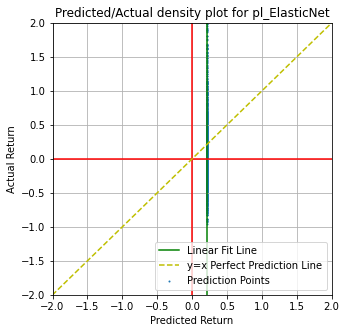

In [20]:
plt.figure(figsize=(5,5))
plotDensityContourPredVsReal('pl_ElasticNet', y_pred, y_test.to_numpy(),2)

In [21]:
# ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PowerTransformer

pl_ElasticNet = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('ElasticNet', ElasticNet(l1_ratio=0.00001))
])

pl_ElasticNet.fit(X_train, y_train)
y_pred_lowL1 = pl_ElasticNet.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_ElasticNet.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, pl_ElasticNet.predict(X_test)))

import pickle
pickle.dump(pl_ElasticNet, open("pl_ElasticNet.p", "wb" ))

train mse:  1.32934318862257
test mse:  4.0855249435415


Text(0.5, 1.0, 'Elasticnet L1 Ratio=0.00001')

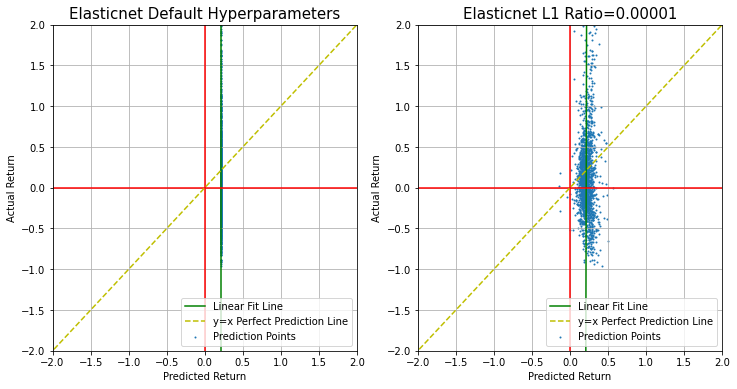

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plotDensityContourPredVsReal('pl_ElasticNet', y_pred, y_test.to_numpy(),2)
plt.title('Elasticnet Default Hyperparameters',fontsize=15)
plt.subplot(1,2,2)
plotDensityContourPredVsReal('pl_ElasticNet', y_pred_lowL1, y_test.to_numpy(),2)
plt.title('Elasticnet L1 Ratio=0.00001',fontsize=15)

In [23]:
# See top 10 stocks and see how the values differ for Low L1 case
y_predtest=pd.DataFrame(y_pred_lowL1)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
y_test_reindexed=y_test.reset_index(drop=True)

#print('Returns:',y_predtest[bl_top10][0].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
#print('Returns:', y_test_reindexed[bl_top10].values)
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%','\n')

# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred_lowL1)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Top 10 Predicted Returns: 48.61 % 

Actual Top 10 Returns: 30.27 % 

Bottom 10 Predicted Returns: -4.37 % 

Actual Bottom 10 Returns: -3.73 %


In [24]:
observePredictionAbility(pl_ElasticNet)

Predicted Performance of Top 10 Return Portfolios: [52.62 52.13 49.68 51.93 59.36 54.01 54.19 45.97 53.73 53.41]
Actual Performance of Top 10 Return Portfolios: [ -8.68   3.72  67.35 109.18  -6.33  30.16 -16.64   5.86  22.02  29.48] 

Predicted Performance of Bottom 10 Return Portfolios: [ -4.73  -5.61  -3.42  -8.19 -10.12 -13.06  -6.86  -2.64  -9.72 -11.16]
Actual Performance of Bottom 10 Return Portfolios: [ 0.24 22.77 12.8  18.27 26.57 36.66 26.7   2.54 65.39 52.7 ]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 3.24
Mean Actual Std. Dev. of Top 10 Return Portfolios: 36.86
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 3.29
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 19.58
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 52.7
Mean Actual Performance of Top 10 Return Portfolios: 23.61
Mean Predicted Performance of Bottom 10 Return Portfolios: -7.55
Mean Actual Performance of Bottom 10 Return Portfolios: 26.46
---------

In [25]:
dir()

['ElasticNet',
 'In',
 'LinearRegression',
 'Out',
 'Pipeline',
 'PowerTransformer',
 'X_test',
 'X_train',
 '_',
 '_22',
 '_6',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'bl_bottom10',
 'bl_top10',
 'cross_validate',
 'exit',
 'get_ipython',
 'i',
 'math',
 'mean_squared_error',
 'np',
 'observePredictionAbility',
 'pd',
 'pickle',
 'pl_ElasticNet',
 'pl_linear',
 'plotDensityContourPredVsReal',
 'plt',
 'python_version',
 'quit',
 'scatter_matrix',
 'scores',
 'train_test_split',
 'vals',
 'x',
 'y',
 'y_pred',
 'y_pred_lowL1',
 'y_predtest',
 'y_test',
 'y_test_reindexed',
 'y_train']

In [29]:
whos

Variable                       Type         Data/Info
-----------------------------------------------------
ElasticNet                     ABCMeta      <class 'sklearn.linear_mo<...>nate_descent.ElasticNet'>
LinearRegression               ABCMeta      <class 'sklearn.linear_mo<...>._base.LinearRegression'>
Pipeline                       ABCMeta      <class 'sklearn.pipeline.Pipeline'>
PowerTransformer               type         <class 'sklearn.preproces<...>._data.PowerTransformer'>
X_test                         DataFrame             EV/EBIT  Op. In.<...>n[1852 rows x 18 columns]
X_train                        DataFrame             EV/EBIT  Op. In.<...>[16668 rows x 18 columns]
bl_bottom10                    Series       0       False\n1       Fa<...>Length: 1852, dtype: bool
bl_top10                       Series       0       False\n1       Fa<...>Length: 1852, dtype: bool
cross_validate                 function     <function cross_validate at 0x000001AF38191790>
i                   

In [20]:
# KNeighbors regressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
pl_KNeighbors = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=40))
])

pl_KNeighbors.fit(X_train, y_train)
y_pred = pl_KNeighbors.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_KNeighbors.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, pl_KNeighbors.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(pl_KNeighbors.score(X_train, y_train)))
print('Test set score:', format(pl_KNeighbors.score(X_test, y_test)))

import pickle
pickle.dump(pl_KNeighbors, open("pl_KNeighbors.p", "wb" ))

train mse:  1.5828096263804747
test mse:  1.1781753592106858
train rmse:  1.2580976219596294
test rmse:  1.0854378652003467
Training set score: 0.04465099991894261
Test set score: 0.06297957657202713


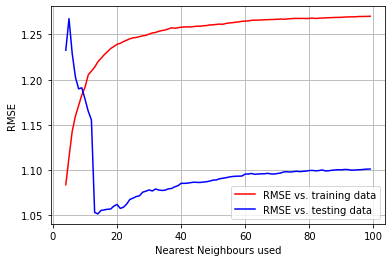

In [9]:
train_errors, test_errors, test_sizes=[], [], []

for i in range(4,100):
    pl_KNeighbors = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=i))])
    pl_KNeighbors.fit(X_train, y_train)
    y_pred = pl_KNeighbors.predict(X_test)
    train_errors.append(mean_squared_error(y_train, pl_KNeighbors.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, y_pred))
    test_sizes.append(i)

plt.plot(test_sizes, np.sqrt(train_errors),'r',test_sizes, np.sqrt(test_errors),'b')
plt.legend(['RMSE vs. training data','RMSE vs. testing data'])
plt.grid()
#plt.ylim([0,0.6])
plt.ylabel('RMSE');
plt.xlabel('Nearest Neighbours used');

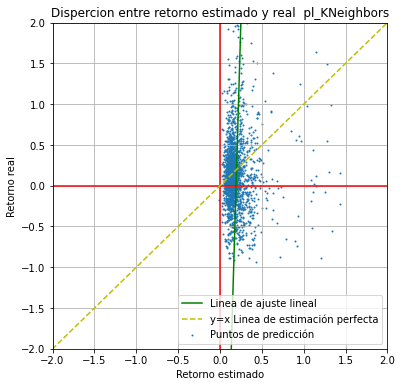

In [30]:
plt.figure(figsize=(6,6))
plotDensityContourPredVsReal('pl_KNeighbors', y_pred, y_test.to_numpy(),2)

In [31]:
observePredictionAbility(pl_KNeighbors)

Predicted Performance of Top 10 Return Portfolios: [144.7  138.63 142.79 164.92 149.45 133.1  156.98 167.94 149.09 149.27]
Actual Performance of Top 10 Return Portfolios: [81.88 41.18 28.72 95.05 76.65 96.44 50.62 -1.02 54.34 73.95] 

Predicted Performance of Bottom 10 Return Portfolios: [2.04 1.57 2.16 1.92 1.54 1.69 2.35 2.46 2.07 2.18]
Actual Performance of Bottom 10 Return Portfolios: [  0.85 -10.81   6.65   3.79   2.63   1.25  -0.61  -3.88  13.87   0.65]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 10.43
Mean Actual Std. Dev. of Top 10 Return Portfolios: 29.47
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 0.3
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 6.1
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 149.69
Mean Actual Performance of Top 10 Return Portfolios: 59.78
Mean Predicted Performance of Bottom 10 Return Portfolios: 2.0
Mean Actual Performance of Bottom 10 Return Portfolios: 1.44
--------------



# ARBOL DE DECISION

In [24]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

pl_decTree = Pipeline([
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42)) # no need scaler
])

pl_decTree.fit(X_train, y_train)
y_pred = pl_decTree.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_decTree.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))

import pickle
pickle.dump(pl_decTree, open("pl_decTree.p", "wb" ))

train mse:  0.0
test mse:  2.0572691659266824


In [1]:
train_errors, test_errors, test_sizes=[], [], []

for i in range(2,50):
    pl_decTree = Pipeline([
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42, max_depth=i))])
    pl_decTree.fit(X_train, y_train)
    y_pred = pl_decTree.predict(X_test)
    train_errors.append(mean_squared_error(y_train, pl_decTree.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, y_pred))
    test_sizes.append(i)

plt.plot(test_sizes, np.sqrt(train_errors),'r',test_sizes, np.sqrt(test_errors),'b')
plt.legend(['RMSE vs. datos de entrenamiento','RMSE vs. datos de prueba'])
plt.grid()
#plt.ylim([0,0.6])
plt.ylabel('RMSE');
plt.xlabel('max_depth');

NameError: name 'Pipeline' is not defined

In [25]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

pl_decTree =DecisionTreeRegressor(random_state=42, max_depth=8)

pl_decTree.fit(X_train, y_train)
y_pred = pl_decTree.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_decTree.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))

import pickle
pickle.dump(pl_decTree, open("pl_decTree.p", "wb" ))

train mse:  0.40578620222705414
test mse:  1.4379857303205181


In [26]:
print("Feature importances:")
print(pl_decTree.feature_importances_)

Feature importances:
[0.00468031 0.00721404 0.01097608 0.35200738 0.24074447 0.00393502
 0.00059471 0.02788661 0.         0.04662581 0.0022734  0.00779751
 0.00573126 0.00459733 0.0260664  0.23754822 0.00844123 0.01288023]


In [27]:
# Can see the importance of each feature in random forest.
ks, scores=[],[]
for k, score in zip(x.keys(), pl_decTree.feature_importances_):
    print(k, round(score,3))
    ks.append(k)
    scores.append(score)

EV/EBIT 0.005
Op. In./(NWC+FA) 0.007
P/E 0.011
P/B 0.352
P/S 0.241
Op. In./Interest Expense 0.004
Working Capital Ratio 0.001
RoE 0.028
ROCE 0.0
Debt/Equity 0.047
Debt Ratio 0.002
Cash Ratio 0.008
Asset Turnover 0.006
Gross Profit Margin 0.005
(CA-CL)/TA 0.026
RE/TA 0.238
EBIT/TA 0.008
Book Equity/TL 0.013


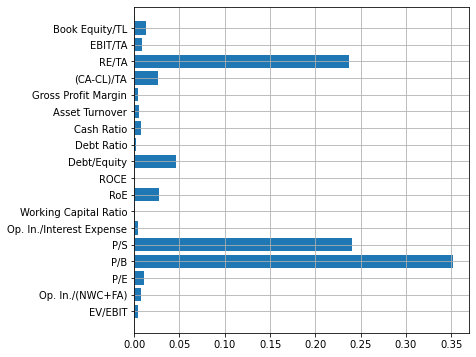

In [30]:
plt.figure(figsize=(6,6))
plt.barh(ks,scores)
plt.grid()


In [47]:
observePredictionAbility(pl_decTree)

Predicted Performance of Top 10 Return Portfolios: [2129.65  982.6   425.94 1259.75  460.68  629.47 1269.33  750.72  226.11
 2464.53]
Actual Performance of Top 10 Return Portfolios: [ -3.4    1.22 109.42  70.32  -7.78  77.13 260.63  98.06   4.2  147.57] 

Predicted Performance of Bottom 10 Return Portfolios: [-25.64 -67.67 -43.1  -43.45 -60.53 -23.27 -38.18 -61.3  -46.61 -47.09]
Actual Performance of Bottom 10 Return Portfolios: [  5.14 176.09 128.69  71.3  123.17  50.26  93.15  11.5   47.01 120.85]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 703.15
Mean Actual Std. Dev. of Top 10 Return Portfolios: 80.57
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 13.87
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 52.52
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 1059.88
Mean Actual Performance of Top 10 Return Portfolios: 75.74
Mean Predicted Performance of Bottom 10 Return Portfolios: -45.68
Mean Actual Performance of Bottom

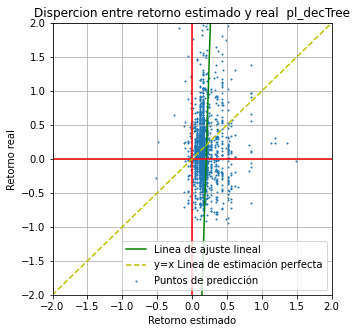

In [48]:
plt.figure(figsize=(5,5))
plotDensityContourPredVsReal('pl_decTree', y_pred, y_test.to_numpy(),2)

In [49]:
from sklearn.model_selection import cross_validate

pl_decTree = Pipeline([
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42, max_depth=8))])

scores = cross_validate(pl_decTree, x, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
print('K=10 Segments.')
print('Train scores', np.round(np.sqrt(-scores['train_score']), 2) )
print('Test scores', np.round(np.sqrt(-scores['test_score']), 2) )
print('-----------------')
print('AVERAGE TEST SCORE:', round(np.sqrt(-scores['test_score']).mean(),4),\
     'STD. DEV.:', round(np.sqrt(-scores['test_score']).std(),4))
print('AVERAGE TRAIN SCORE:', round(np.sqrt(-scores['train_score']).mean(),4),\
     'STD. DEV.:', round(np.sqrt(-scores['train_score']).std(),4))
print('-----------------')

K=10 Segments.
Train scores [0.68 0.71 0.65 0.62 0.62 0.61 0.59 0.62 0.66 0.64]
Test scores [0.76 2.14 1.39 1.86 1.13 2.29 1.97 1.12 1.86 1.06]
-----------------
AVERAGE TEST SCORE: 1.5587 STD. DEV.: 0.5018
AVERAGE TRAIN SCORE: 0.6409 STD. DEV.: 0.0341
-----------------


In [12]:
# Create table of top10 averaged and average that to give us a synthetic performance result.
def getMyPredictionAbility(my_pipeline):
    Top10PredRtrns=np.array([])
    Top10ActRtrns=np.array([])
    Bottom10PredRtrns=np.array([])
    Bottom10ActRtrns=np.array([])
    for i in range (0,10):
        # Pipeline and train/test
        X_train, X_test, y_train, y_test =\
        train_test_split(x, y, test_size=0.1, random_state=i)
        my_pipeline.fit(X_train, y_train)
        y_pred = my_pipeline.predict(X_test)
        
        # See top 10 stocks and see how the values differ
        y_predtest=pd.DataFrame(y_pred)
        bl_top10=\
        (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
        y_test_reindexed=y_test.reset_index(drop=True)
        Top10PredRtrns=np.append(Top10PredRtrns,\
                    round( np.mean(y_predtest[bl_top10][0])*100,2 ))
        Top10ActRtrns=np.append(Top10ActRtrns,\
                    round( np.mean(y_test_reindexed[bl_top10])*100,2 ))
        
        # See bottom 10 stocks and see how the values differ
        y_predtest=pd.DataFrame(y_pred)
        bl_bottom10=\
        (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])
        Bottom10PredRtrns=\
        np.append(Bottom10PredRtrns,\
                  round( np.mean(y_predtest[bl_bottom10][0])*100,2 ))
        
        Bottom10ActRtrns=\
        np.append( Bottom10ActRtrns,\
                  round(np.mean(y_test_reindexed[bl_bottom10])*100,2 ))
    return round(Top10ActRtrns.mean(),2), round(Top10PredRtrns.std(),2)

In [52]:
for my_depth in [4,5,6,7,8,9,10,15,20,30,50]:
    decTree = DecisionTreeRegressor(random_state=42, max_depth=my_depth) # no need scaler
    performance, certainty = getMyPredictionAbility(decTree)
    print('Tree max_depth:', my_depth, 'Average Return:', performance,'Standard Deviation:', certainty)

Tree max_depth: 4 Average Return: nan Standard Deviation: nan
Tree max_depth: 5 Average Return: 116.04 Standard Deviation: 1267.29
Tree max_depth: 6 Average Return: 85.35 Standard Deviation: 823.52
Tree max_depth: 7 Average Return: 62.02 Standard Deviation: 791.13
Tree max_depth: 8 Average Return: 75.74 Standard Deviation: 703.15
Tree max_depth: 9 Average Return: 76.78 Standard Deviation: 644.78
Tree max_depth: 10 Average Return: 86.33 Standard Deviation: 683.09
Tree max_depth: 15 Average Return: 58.66 Standard Deviation: 753.9
Tree max_depth: 20 Average Return: 42.02 Standard Deviation: 747.5
Tree max_depth: 30 Average Return: 55.04 Standard Deviation: 829.96
Tree max_depth: 50 Average Return: 57.32 Standard Deviation: 858.14


In [10]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

pl_decTree = Pipeline([
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42, max_depth=9))
])

pl_decTree.fit(X_train, y_train)
y_pred = pl_decTree.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_decTree.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, pl_decTree.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(pl_decTree.score(X_train, y_train)))
print('Test set score:', format(pl_decTree.score(X_test, y_test)))

import pickle
pickle.dump(pl_decTree, open("pl_decTree.p", "wb" ))

train mse:  0.35172807594033656
test mse:  1.4926970688218835
train rmse:  0.5930666707380685
test rmse:  1.2217598245243961
Training set score: 0.7877046866220778
Test set score: -0.1871642269061038


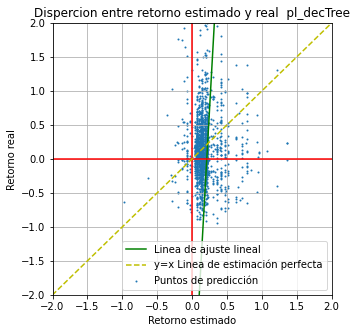

In [64]:
plt.figure(figsize=(5,5))
plotDensityContourPredVsReal('pl_decTree', y_pred, y_test.to_numpy(),2)

In [66]:
# See top 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
y_test_reindexed=y_test.reset_index(drop=True)

#print('Returns:',y_predtest[bl_top10][0].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
#print('Returns:', y_test_reindexed[bl_top10].values)
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%','\n')

# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Top 10 Predicted Returns: 745.14 % 

Actual Top 10 Returns: 51.67 % 

Bottom 10 Predicted Returns: -42.65 % 

Actual Bottom 10 Returns: 30.44 %


In [67]:
observePredictionAbility(pl_decTree)

Predicted Performance of Top 10 Return Portfolios: [1799.   1093.87  521.12 1233.61  507.13  745.14  442.44  557.89  359.34
 2418.45]
Actual Performance of Top 10 Return Portfolios: [ 22.16  -1.41 104.54  33.53  11.25  51.67 251.5   25.99  67.05 201.5 ] 

Predicted Performance of Bottom 10 Return Portfolios: [-43.39 -58.43 -47.53 -55.86 -68.06 -42.65 -43.54 -60.06 -63.14 -66.07]
Actual Performance of Bottom 10 Return Portfolios: [-12.53  54.78 157.41  -1.96 123.17  30.44  21.17  17.88  -0.35  25.04]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 644.78
Mean Actual Std. Dev. of Top 10 Return Portfolios: 80.88
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 9.34
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 53.11
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 967.8
Mean Actual Performance of Top 10 Return Portfolios: 76.78
Mean Predicted Performance of Bottom 10 Return Portfolios: -54.87
Mean Actual Performance of Bottom 10

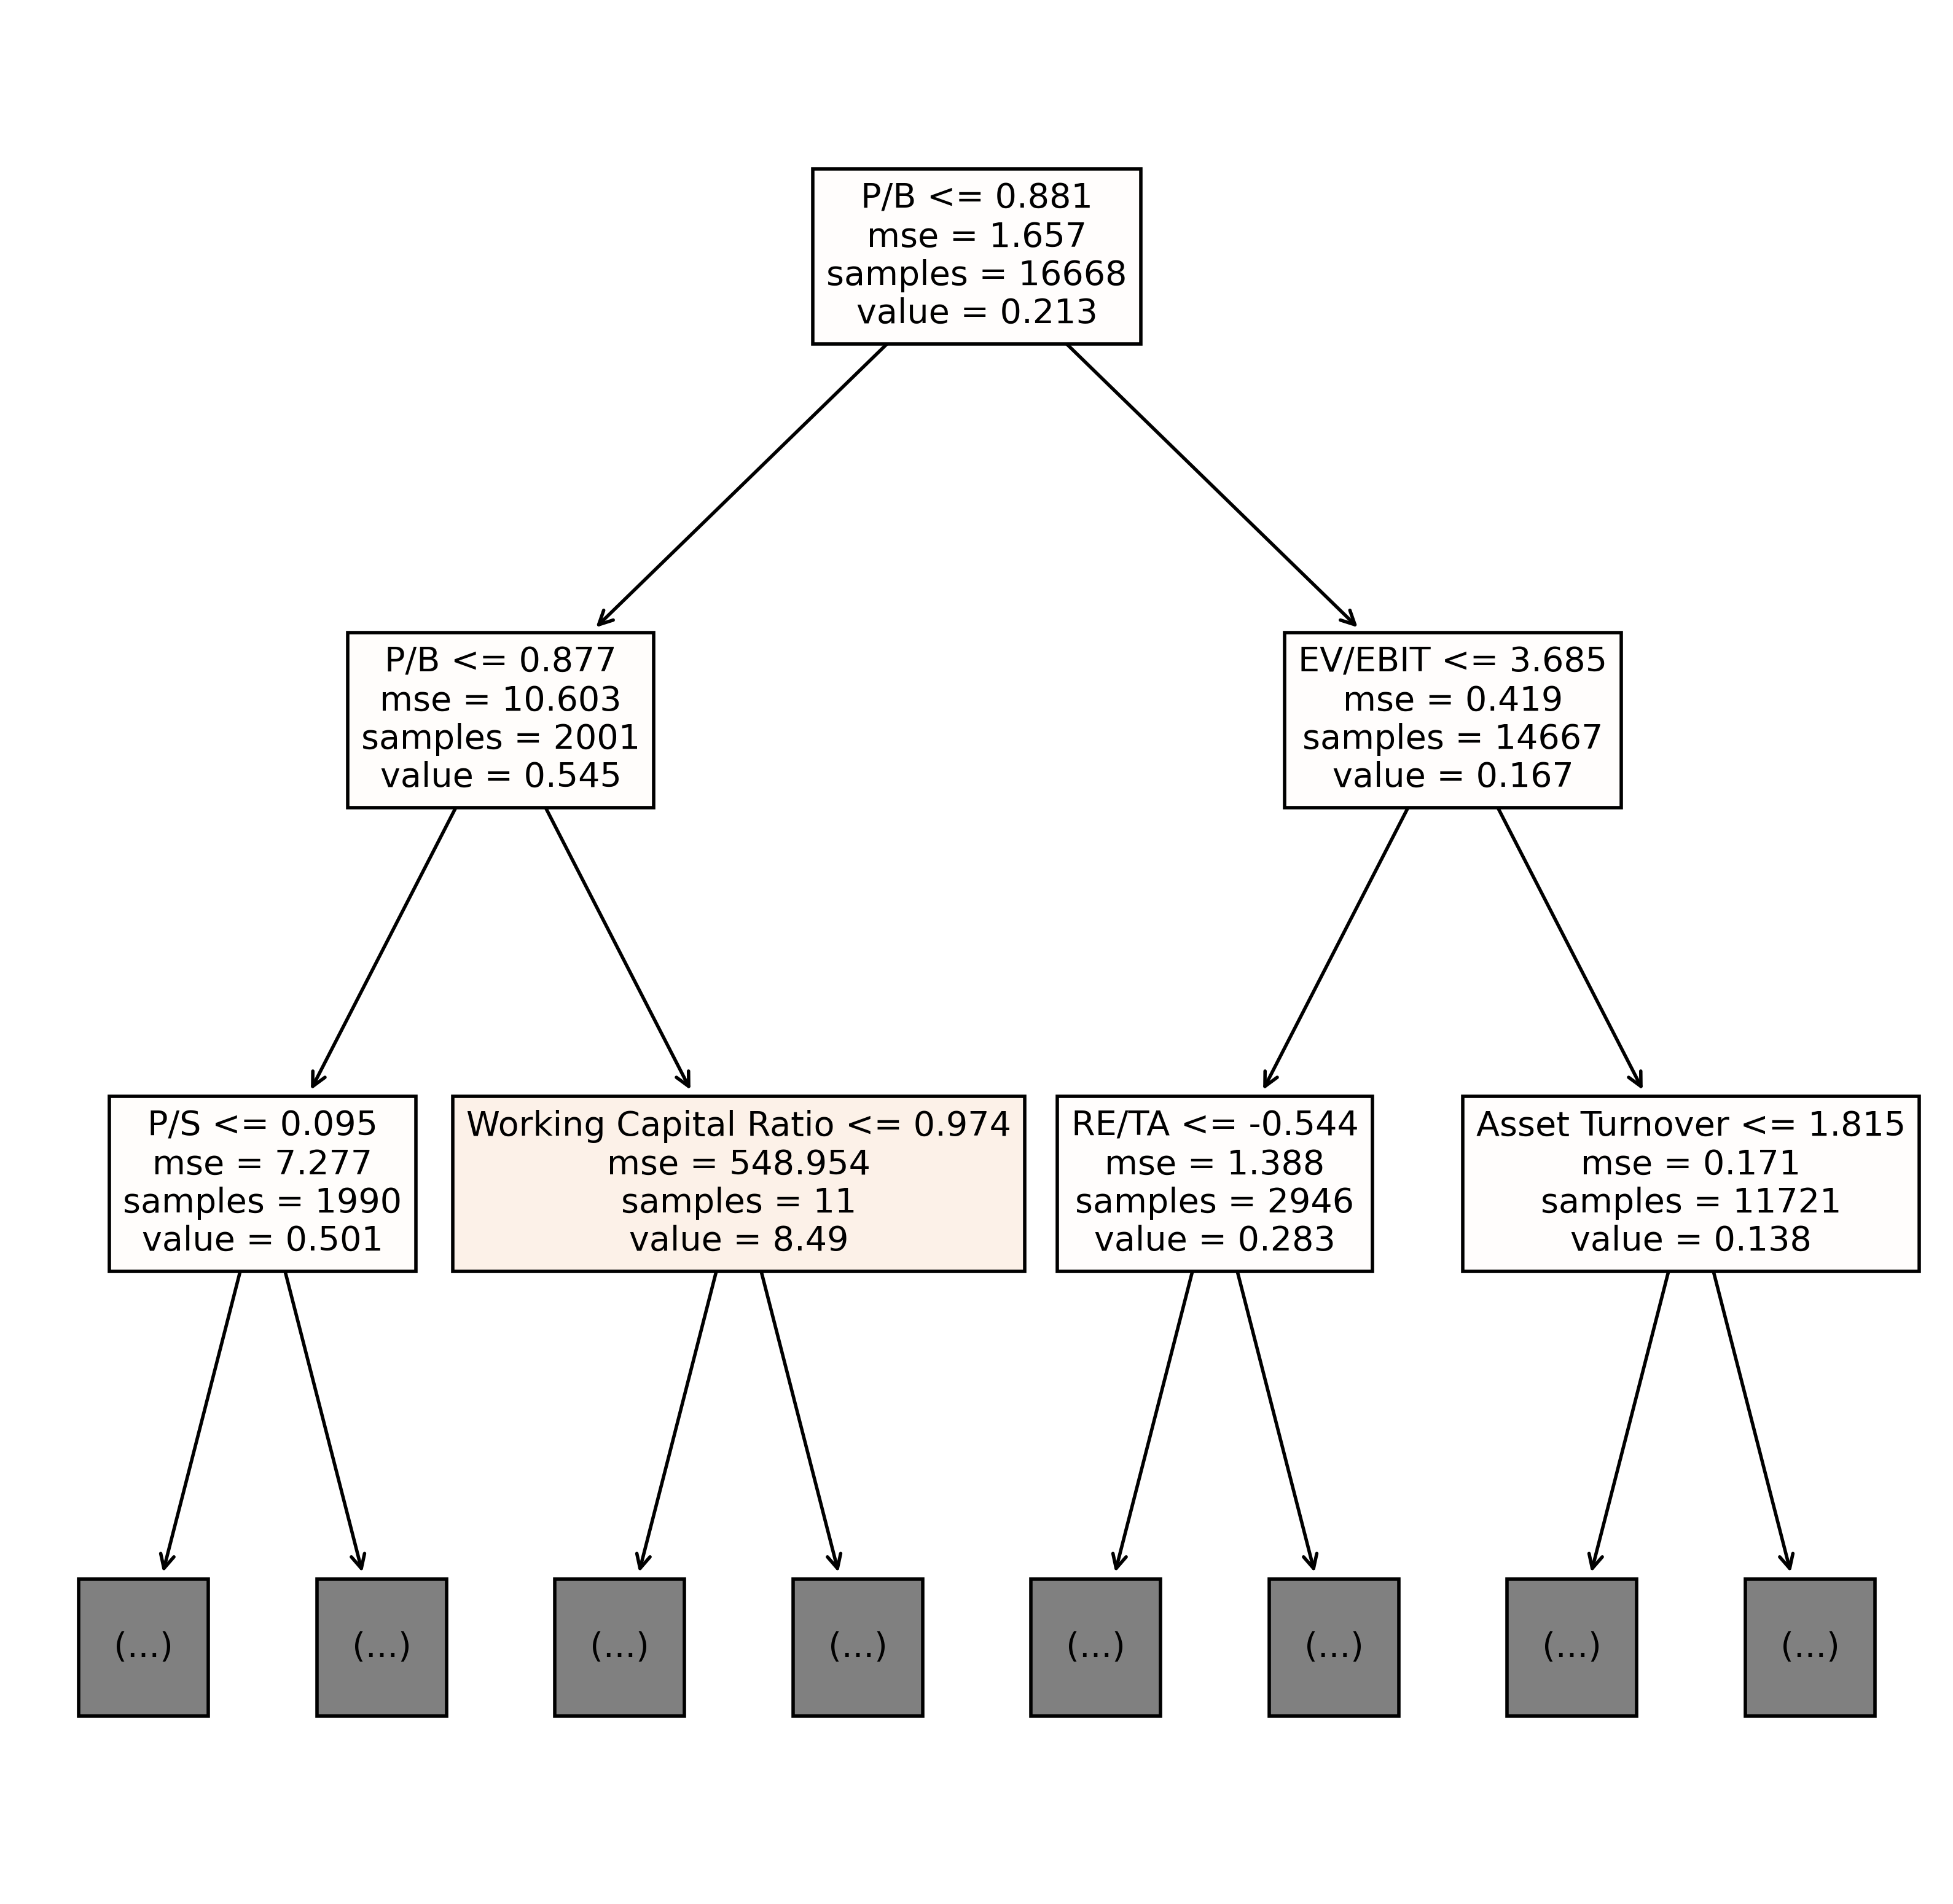

In [68]:
# See the decision tree
reg_decTree = DecisionTreeRegressor(random_state=42, max_depth=20)
reg_decTree.fit(X_train, y_train)
from sklearn import tree # Need this to see decision tree.
plt.figure(figsize=(10,10), dpi=400) # set figsize so we can see it
tree.plot_tree(reg_decTree, feature_names = x.keys(),  filled = True, max_depth=2, fontsize=10);
plt.savefig('RegDecTree.png')

In [13]:
from sklearn.ensemble import RandomForestRegressor
for my_depth in range(4,21):
    rForest = RandomForestRegressor(random_state=42, max_depth=my_depth) # no need scaler
    performance, certainty = getMyPredictionAbility(rForest)
    print('Tree max_depth:', my_depth, 'Average Return:', performance,'Standard Deviation:', certainty)

Tree max_depth: 4 Average Return: 74.45 Standard Deviation: 176.93
Tree max_depth: 5 Average Return: 72.98 Standard Deviation: 162.67
Tree max_depth: 6 Average Return: 77.57 Standard Deviation: 173.39
Tree max_depth: 7 Average Return: 74.23 Standard Deviation: 172.48
Tree max_depth: 8 Average Return: 83.34 Standard Deviation: 164.13
Tree max_depth: 9 Average Return: 65.18 Standard Deviation: 176.36
Tree max_depth: 10 Average Return: 74.83 Standard Deviation: 164.42
Tree max_depth: 11 Average Return: 83.85 Standard Deviation: 174.35
Tree max_depth: 12 Average Return: 72.14 Standard Deviation: 170.03
Tree max_depth: 13 Average Return: 78.41 Standard Deviation: 167.1
Tree max_depth: 14 Average Return: 88.31 Standard Deviation: 174.48
Tree max_depth: 15 Average Return: 81.29 Standard Deviation: 178.25
Tree max_depth: 16 Average Return: 84.6 Standard Deviation: 170.7
Tree max_depth: 17 Average Return: 84.36 Standard Deviation: 177.43
Tree max_depth: 18 Average Return: 87.15 Standard Deviati

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfregressor = RandomForestRegressor(random_state=5, max_depth=10)

rfregressor.fit(X_train, y_train)
y_pred = rfregressor.predict(X_test)
print('train mse: ', mean_squared_error(y_train, rfregressor.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, rfregressor.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(rfregressor.score(X_train, y_train)))
print('Test set score:', format(rfregressor.score(X_test, y_test)))

import pickle
pickle.dump(rfregressor, open("pl_rfregressor.p", "wb" ))

train mse:  0.492752624329796
test mse:  1.2518249826808494
train rmse:  0.701963406688551
test rmse:  1.1188498481390832
Training set score: 0.7025853778655067
Test set score: 0.004404933307074477


In [79]:
from sklearn.ensemble import ExtraTreesRegressor

ETregressor = ExtraTreesRegressor(random_state=42, max_depth=10)

ETregressor.fit(X_train, y_train)
y_pred_ET = ETregressor.predict(X_test)
print('train mse: ', mean_squared_error(y_train, ETregressor.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred_ET))

import pickle
pickle.dump(ETregressor, open("pl_ETregressor.p", "wb" ))

train mse:  0.5004116906207168
test mse:  1.2742719308208845


Text(0.5, 1.0, 'Extra (Random) Trees Regressor')

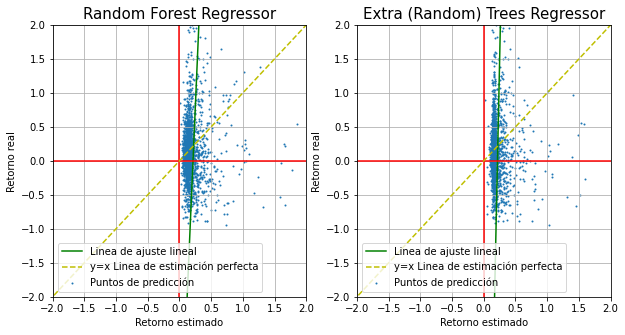

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plotDensityContourPredVsReal('rfregressor', y_pred, y_test.to_numpy(),2)
plt.title('Random Forest Regressor',fontsize=15)
plt.subplot(1,2,2)
plotDensityContourPredVsReal('ETregressor', y_pred_ET, y_test.to_numpy(),2)
plt.title('Extra (Random) Trees Regressor',fontsize=15)

In [15]:
# See top 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
y_test_reindexed=y_test.reset_index(drop=True)

#print('Returns:',y_predtest[bl_top10][0].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
#print('Returns:', y_test_reindexed[bl_top10].values)
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%','\n')

# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Top 10 Predicted Returns: 362.0 % 

Actual Top 10 Returns: 74.63 % 

Bottom 10 Predicted Returns: 2.36 % 

Actual Bottom 10 Returns: 43.69 %


In [18]:
observePredictionAbility(rfregressor)

Predicted Performance of Top 10 Return Portfolios: [636.3  676.04 322.42 477.07 346.06 362.   467.54 451.15 390.45 957.54]
Actual Performance of Top 10 Return Portfolios: [ 37.4   88.33  67.56  64.96  23.94  74.63 191.28  25.31  70.25 129.27] 

Predicted Performance of Bottom 10 Return Portfolios: [ 1.99  0.99  1.98  0.71 -0.12  2.36  4.38  1.    3.11  0.93]
Actual Performance of Bottom 10 Return Portfolios: [ -5.1  -22.34  81.76   2.03 -11.97  43.69 -35.46  -9.71  18.91  49.15]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 186.66
Mean Actual Std. Dev. of Top 10 Return Portfolios: 48.23
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 1.25
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 34.87
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 508.66
Mean Actual Performance of Top 10 Return Portfolios: 77.29
Mean Predicted Performance of Bottom 10 Return Portfolios: 1.73
Mean Actual Performance of Bottom 10 Return Portfolios: 11

In [83]:
observePredictionAbility(ETregressor)

Predicted Performance of Top 10 Return Portfolios: [529.39 332.22 212.51 226.93 415.4  280.37 310.06 229.9  141.03 523.  ]
Actual Performance of Top 10 Return Portfolios: [  5.46 126.96  54.44  15.99 108.1  127.16  71.09  53.95  -6.89 101.5 ] 

Predicted Performance of Bottom 10 Return Portfolios: [  2.28  -3.75   3.1  -10.09  -2.9    5.83   4.54 -11.11  -4.1   -4.62]
Actual Performance of Bottom 10 Return Portfolios: [ 44.44  -9.76  75.68 -10.28 -19.52  21.68 -23.95  18.03  19.16  74.49]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 125.03
Mean Actual Std. Dev. of Top 10 Return Portfolios: 47.19
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 5.59
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 34.58
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 320.08
Mean Actual Performance of Top 10 Return Portfolios: 65.78
Mean Predicted Performance of Bottom 10 Return Portfolios: -2.08
Mean Actual Performance of Bottom 10 Return Por

In [31]:
# Can see the importance of each feature in random forest.
ks, scores=[],[]
for k, score in zip(x.keys(), rfregressor.feature_importances_):
    print(k, round(score,3))
    ks.append(k)
    scores.append(score)

EV/EBIT 0.036
Op. In./(NWC+FA) 0.049
P/E 0.032
P/B 0.06
P/S 0.142
Op. In./Interest Expense 0.061
Working Capital Ratio 0.03
RoE 0.048
ROCE 0.005
Debt/Equity 0.014
Debt Ratio 0.014
Cash Ratio 0.027
Asset Turnover 0.032
Gross Profit Margin 0.026
(CA-CL)/TA 0.033
RE/TA 0.247
EBIT/TA 0.121
Book Equity/TL 0.022


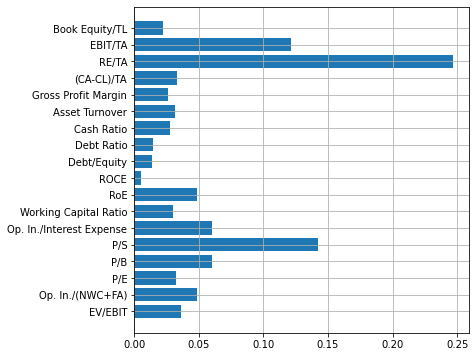

In [33]:
plt.figure(figsize=(6,6))
plt.barh(ks,scores)
plt.grid()

In [4]:
 x.mean()

EV/EBIT                     13.308929
Op. In./(NWC+FA)             0.172849
P/E                         17.279793
P/B                          4.066544
P/S                         14.936453
Op. In./Interest Expense    26.129201
Working Capital Ratio        2.710205
RoE                          0.025857
ROCE                         0.119500
Debt/Equity                  2.326597
Debt Ratio                   2.706315
Cash Ratio                   1.406278
Asset Turnover              36.242589
Gross Profit Margin          0.395642
(CA-CL)/TA                   0.216920
RE/TA                       -0.329447
EBIT/TA                      0.022236
Book Equity/TL               1.642692
dtype: float64

In [5]:
y.mean()

0.21359472483409114

In [6]:
# Put in a dataframe for prediction
avg_company = pd.DataFrame(x.mean().values.reshape(1,-1), columns=x.keys())

In [89]:
rfregressor.predict(avg_company)

array([0.2836652])

In [113]:
# Try making a bunch of numbers reflect higher earnings relative to price
avg_company['EV/EBIT']=1
avg_company['Op. In./(NWC+FA)']=0.5
avg_company['P/E']=10
avg_company['P/B']=2
avg_company['P/S']=4
avg_company['Op. In./Interest Expense']=5
avg_company['EBIT/TA']=0.6

rfregressor.predict(avg_company)

array([0.20242375])

In [11]:
pl_linear.predict(avg_company)

array([0.11425993])

In [13]:
pl_KNeighbors.predict(avg_company)

array([0.29209729])

In [15]:
pl_decTree.predict(avg_company)

array([0.14970159])

In [17]:
rfregressor.predict(avg_company)

array([0.16238517])